In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [41]:
data = pd.read_excel('dataKasus-1.xlsx')
print(data)

      NO      NAMA   USIA  PARITAS JARAK KELAHIRAN RIW HIPERTENSI RIW PE  \
0      1    NAMA 1  23 TH        3       < 2 tahun          Tidak  Tidak   
1      2    NAMA 2  29 TH        2       < 2 tahun          Tidak    PEB   
2      3    NAMA 3  20 TH        1    anak pertama          Tidak  Tidak   
3      4    NAMA 4  18 TH        1    anak pertama          Tidak  Tidak   
4      5    NAMA 5  34 TH        3      > 2 tahun           Tidak  Tidak   
..   ...       ...    ...      ...             ...            ...    ...   
556  558  NAMA 557  40 TH        3      > 2 tahun           Tidak  Tidak   
557  559  NAMA 558  28 TH        3       < 2 tahun          Tidak  Tidak   
558  560  NAMA 559  41 TH        3      > 2 tahun           Tidak  Tidak   
559  561  NAMA 560  32 TH        2      > 2 tahun           Tidak  Tidak   
560  562  NAMA 561  30 TH        2      > 2 tahun           Tidak  Tidak   

    OBESITAS RIW DM RIW HIPERTENSI/PE DALAM KELUARGA SOSEK RENDAH PE/Non PE  \
0      T

In [42]:
data2 = data.drop(columns=['Unnamed: 12'])

In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NO                                561 non-null    int64 
 1   NAMA                              561 non-null    object
 2   USIA                              558 non-null    object
 3   PARITAS                           561 non-null    int64 
 4   JARAK KELAHIRAN                   554 non-null    object
 5   RIW HIPERTENSI                    561 non-null    object
 6   RIW PE                            561 non-null    object
 7   OBESITAS                          561 non-null    object
 8   RIW DM                            561 non-null    object
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object
 10  SOSEK RENDAH                      561 non-null    object
 11  PE/Non PE                         561 non-null    object
dtypes: int64(2), object(10

In [44]:
def counts(nama_kolom):
    counts = data2[nama_kolom].value_counts()
    return counts


In [45]:
data2['USIA'] = data2['USIA'].astype(str).str.replace(' TH', '')
data2['USIA'] = pd.to_numeric(data2['USIA'], errors='coerce')

In [46]:
mean_age = data2['USIA'].mean()
data2['USIA'].fillna(mean_age, inplace=True)
data2 = data2.dropna()

C:\Users\ACER\AppData\Local\Temp\ipykernel_4044\1444560162.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['USIA'].fillna(mean_age, inplace=True)


In [47]:
print(data2['USIA'])

0      23.0
1      29.0
2      20.0
3      18.0
4      34.0
       ... 
556    40.0
557    28.0
558    41.0
559    32.0
560    30.0
Name: USIA, Length: 554, dtype: float64


In [48]:
print(data2['JARAK KELAHIRAN'])

0         < 2 tahun
1         < 2 tahun
2      anak pertama
3      anak pertama
4        > 2 tahun 
           ...     
556      > 2 tahun 
557       < 2 tahun
558      > 2 tahun 
559      > 2 tahun 
560      > 2 tahun 
Name: JARAK KELAHIRAN, Length: 554, dtype: object


In [49]:
data2['JARAK KELAHIRAN'] = data2['JARAK KELAHIRAN'].replace('> 2 tahun ','> 2 tahun')

In [50]:
data2['JARAK KELAHIRAN'] = LabelEncoder().fit_transform(data2['JARAK KELAHIRAN'])

In [51]:
print(counts('JARAK KELAHIRAN'))

JARAK KELAHIRAN
2    260
1    213
0     81
Name: count, dtype: int64


In [52]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NO                                554 non-null    int64  
 1   NAMA                              554 non-null    object 
 2   USIA                              554 non-null    float64
 3   PARITAS                           554 non-null    int64  
 4   JARAK KELAHIRAN                   554 non-null    int64  
 5   RIW HIPERTENSI                    554 non-null    object 
 6   RIW PE                            554 non-null    object 
 7   OBESITAS                          554 non-null    object 
 8   RIW DM                            554 non-null    object 
 9   RIW HIPERTENSI/PE DALAM KELUARGA  554 non-null    object 
 10  SOSEK RENDAH                      554 non-null    object 
 11  PE/Non PE                         554 non-null    object 
dtypes: float64(1)

In [53]:
print(data2['RIW PE'].head)

<bound method NDFrame.head of 0      Tidak
1        PEB
2      Tidak
3      Tidak
4      Tidak
       ...  
556    Tidak
557    Tidak
558    Tidak
559    Tidak
560    Tidak
Name: RIW PE, Length: 554, dtype: object>


In [54]:
data2['RIW HIPERTENSI'] = data2['RIW HIPERTENSI'].map({'Ya':1,'Tidak':0})

In [55]:
print(counts('RIW HIPERTENSI'))

RIW HIPERTENSI
0    501
1     53
Name: count, dtype: int64


In [56]:
print(counts('RIW PE'))

RIW PE
Tidak                     519
PEB                        19
PE                          6
Impending PE                2
HELLP SYNDROM               2
Impending Eklamsia          1
Kejang Konvulsi             1
impending eklamsia          1
PE, HELLP Syndrome          1
PEB impending eklampsi      1
Impending Ekalmsia          1
Name: count, dtype: int64


In [57]:
data2['RIW PE'] = data2['RIW PE'].apply(lambda x: 'Ya' if x != 'Tidak' else 'Tidak')
data2['RIW PE'] = data2['RIW PE'].map({'Ya':1,'Tidak':0})

In [58]:
print(counts('RIW PE'))

RIW PE
0    519
1     35
Name: count, dtype: int64


In [59]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NO                                554 non-null    int64  
 1   NAMA                              554 non-null    object 
 2   USIA                              554 non-null    float64
 3   PARITAS                           554 non-null    int64  
 4   JARAK KELAHIRAN                   554 non-null    int64  
 5   RIW HIPERTENSI                    554 non-null    int64  
 6   RIW PE                            554 non-null    int64  
 7   OBESITAS                          554 non-null    object 
 8   RIW DM                            554 non-null    object 
 9   RIW HIPERTENSI/PE DALAM KELUARGA  554 non-null    object 
 10  SOSEK RENDAH                      554 non-null    object 
 11  PE/Non PE                         554 non-null    object 
dtypes: float64(1)

In [60]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NO                                554 non-null    int64  
 1   NAMA                              554 non-null    object 
 2   USIA                              554 non-null    float64
 3   PARITAS                           554 non-null    int64  
 4   JARAK KELAHIRAN                   554 non-null    int64  
 5   RIW HIPERTENSI                    554 non-null    int64  
 6   RIW PE                            554 non-null    int64  
 7   OBESITAS                          554 non-null    object 
 8   RIW DM                            554 non-null    object 
 9   RIW HIPERTENSI/PE DALAM KELUARGA  554 non-null    object 
 10  SOSEK RENDAH                      554 non-null    object 
 11  PE/Non PE                         554 non-null    object 
dtypes: float64(1)

In [61]:
print(counts('RIW HIPERTENSI/PE DALAM KELUARGA'))

RIW HIPERTENSI/PE DALAM KELUARGA
Tidak    543
Ada       11
Name: count, dtype: int64


In [62]:
columns_to_encode = ['OBESITAS', 'RIW DM']
for col in columns_to_encode:
    data2[col] = data2[col].map({'Ya': 1, 'Tidak': 0})

In [63]:
print(counts('OBESITAS'))

OBESITAS
0    550
1      4
Name: count, dtype: int64


In [64]:
counts('RIW DM')

RIW DM
0    549
1      5
Name: count, dtype: int64

In [65]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NO                                554 non-null    int64  
 1   NAMA                              554 non-null    object 
 2   USIA                              554 non-null    float64
 3   PARITAS                           554 non-null    int64  
 4   JARAK KELAHIRAN                   554 non-null    int64  
 5   RIW HIPERTENSI                    554 non-null    int64  
 6   RIW PE                            554 non-null    int64  
 7   OBESITAS                          554 non-null    int64  
 8   RIW DM                            554 non-null    int64  
 9   RIW HIPERTENSI/PE DALAM KELUARGA  554 non-null    object 
 10  SOSEK RENDAH                      554 non-null    object 
 11  PE/Non PE                         554 non-null    object 
dtypes: float64(1)

In [66]:
data2['RIW HIPERTENSI/PE DALAM KELUARGA'] = data2['RIW HIPERTENSI/PE DALAM KELUARGA'].map({'Ada':1,'Tidak':0})

In [67]:
counts('RIW HIPERTENSI/PE DALAM KELUARGA')

RIW HIPERTENSI/PE DALAM KELUARGA
0    543
1     11
Name: count, dtype: int64

In [68]:
counts('SOSEK RENDAH')

SOSEK RENDAH
>UMR    550
<UMR      4
Name: count, dtype: int64

In [69]:
data2['SOSEK RENDAH'] = data2['SOSEK RENDAH'].map({'>UMR':1,'<UMR':0})

In [70]:
counts('PE/Non PE')

PE/Non PE
Non PE                    514
PEB                        20
PE                         16
Eklamsia                    1
PE gemelli                  1
PEB impending eklampsi      1
PE                          1
Name: count, dtype: int64

In [71]:
data2['PE/Non PE'] = data2['PE/Non PE'].apply(lambda x: 'PE' if x != 'Non PE' else 'Non PE')
data2['PE/Non PE'] = data2['PE/Non PE'].map({'PE':1,'Non PE':0})

In [72]:
print(counts('PE/Non PE'))

PE/Non PE
0    514
1     40
Name: count, dtype: int64


In [73]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NO                                554 non-null    int64  
 1   NAMA                              554 non-null    object 
 2   USIA                              554 non-null    float64
 3   PARITAS                           554 non-null    int64  
 4   JARAK KELAHIRAN                   554 non-null    int64  
 5   RIW HIPERTENSI                    554 non-null    int64  
 6   RIW PE                            554 non-null    int64  
 7   OBESITAS                          554 non-null    int64  
 8   RIW DM                            554 non-null    int64  
 9   RIW HIPERTENSI/PE DALAM KELUARGA  554 non-null    int64  
 10  SOSEK RENDAH                      554 non-null    int64  
 11  PE/Non PE                         554 non-null    int64  
dtypes: float64(1)

In [74]:
data2=data2.drop(columns=['NAMA'])

In [75]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 560
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NO                                554 non-null    int64  
 1   USIA                              554 non-null    float64
 2   PARITAS                           554 non-null    int64  
 3   JARAK KELAHIRAN                   554 non-null    int64  
 4   RIW HIPERTENSI                    554 non-null    int64  
 5   RIW PE                            554 non-null    int64  
 6   OBESITAS                          554 non-null    int64  
 7   RIW DM                            554 non-null    int64  
 8   RIW HIPERTENSI/PE DALAM KELUARGA  554 non-null    int64  
 9   SOSEK RENDAH                      554 non-null    int64  
 10  PE/Non PE                         554 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 51.9 KB


In [76]:
data2.to_csv('kasus1.csv')

In [77]:
df = pd.read_csv('kasus1.csv')

In [78]:
df.head()

,Unnamed: 0,NO,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE
0,0,1,23.0,3,0,0,0,0,1,0,1,0
1,1,2,29.0,2,0,0,1,0,0,1,1,1
2,2,3,20.0,1,2,0,0,0,0,0,1,0
3,3,4,18.0,1,2,0,0,0,0,0,1,0
4,4,5,34.0,3,1,0,0,0,0,0,1,0


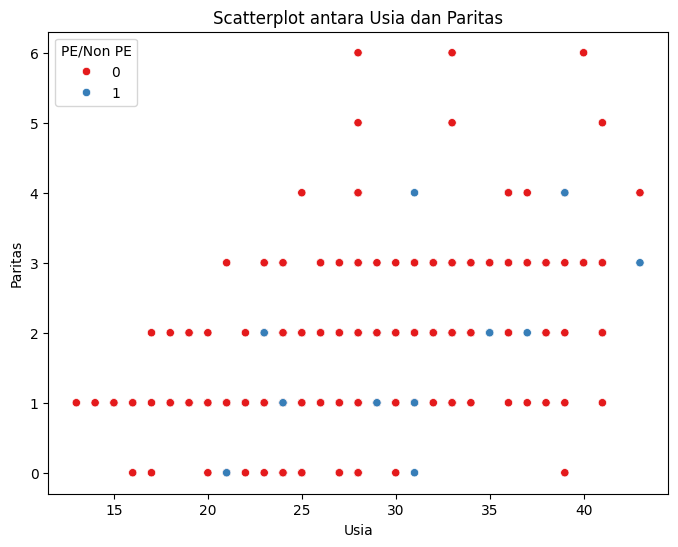

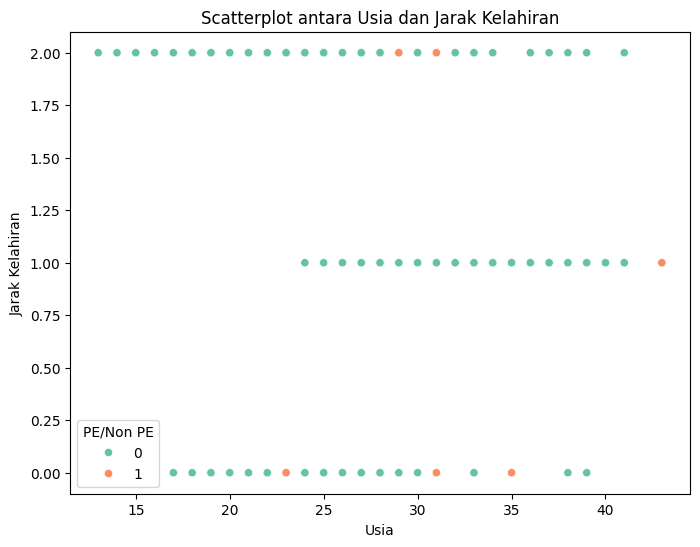

In [86]:
df['PE/Non PE'] = df['PE/Non PE'].astype(str)

# Scatterplot antara Usia dan Paritas
plt.figure(figsize=(8, 6))
sns.scatterplot(x='USIA', y='PARITAS', data=df, hue='PE/Non PE', palette="Set1")
plt.title('Scatterplot antara Usia dan Paritas')
plt.xlabel('Usia')
plt.ylabel('Paritas')
plt.show()

# Scatterplot antara Usia dan Jarak Kelahiran
plt.figure(figsize=(8, 6))
sns.scatterplot(x='USIA', y='JARAK KELAHIRAN', data=df, hue='PE/Non PE', palette="Set2")
plt.title('Scatterplot antara Usia dan Jarak Kelahiran')
plt.xlabel('Usia')
plt.ylabel('Jarak Kelahiran')
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_4044\883187971.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RIW HIPERTENSI', data=df, ax=axes[1, 0], palette="Set2")
C:\Users\ACER\AppData\Local\Temp\ipykernel_4044\883187971.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OBESITAS', data=df, ax=axes[1, 1], palette="Set2")
C:\Users\ACER\AppData\Local\Temp\ipykernel_4044\883187971.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PE/Non PE', data=df, ax=axes[2, 0], palette="Set1")


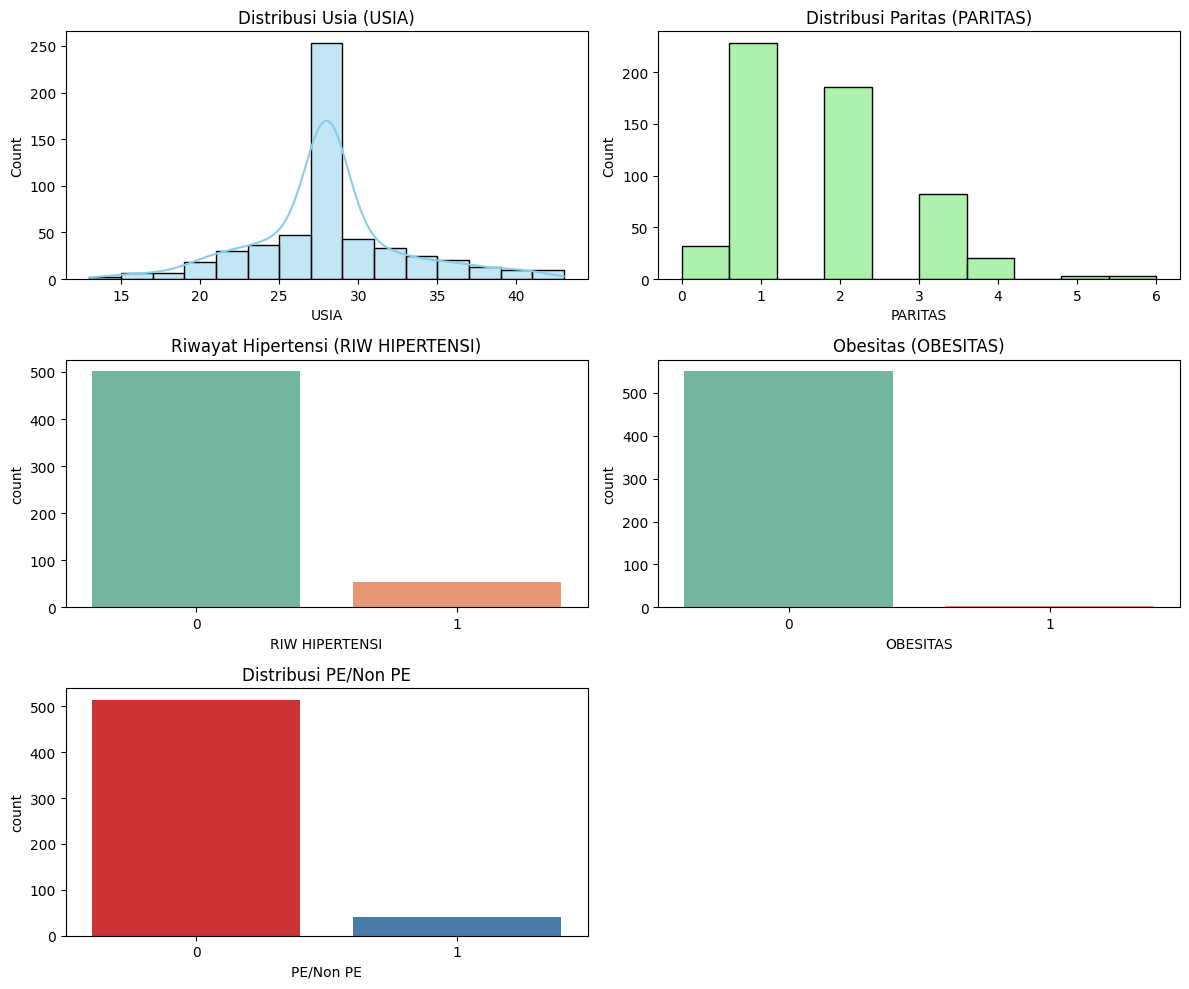

In [87]:
#konversi data menjadi string
df['RIW HIPERTENSI'] = df['RIW HIPERTENSI'].astype(str)
df['OBESITAS'] = df['OBESITAS'].astype(str)
df['PE/Non PE'] = df['PE/Non PE'].astype(str)

# Plotting again after conversion
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Visualisasi data Usia
sns.histplot(df['USIA'], bins=15, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Distribusi Usia (USIA)')

# Visualisasi data Paritas (PARITAS)
sns.histplot(df['PARITAS'], bins=10, kde=False, ax=axes[0, 1], color="lightgreen")
axes[0, 1].set_title('Distribusi Paritas (PARITAS)')

# Visualisasi Data Riwayat Hipertensi (RIW HIPERTENSI)
sns.countplot(x='RIW HIPERTENSI', data=df, ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title('Riwayat Hipertensi (RIW HIPERTENSI)')

# Visualisasi data Obesitas (OBESITAS)
sns.countplot(x='OBESITAS', data=df, ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title('Obesitas (OBESITAS)')

# Visualisasi Data PE/Non PE (Target Variable)
sns.countplot(x='PE/Non PE', data=df, ax=axes[2, 0], palette="Set1")
axes[2, 0].set_title('Distribusi PE/Non PE')

# Menyembunyikan plot yang kosong
axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()